<p style = "font-size:30px; color: #6610f2 "><strong> Data Description</strong></p>

- This dataset consists of reviews of  foods from amazon. The data span
 a period of more than 10 years, including all ~500,000 reviews up to
 October 2012. Reviews include product and user information, ratings, and
 a plain text review. It also includes reviews from all other Amazon
 categories.


- **The Amazon Food Reviews dataset consists of reviews of  foods from Amazon.**
    - Number of reviews: 568,454
    - Number of users: 256,059
    - Number of products: 74,258
    - Timespan: Oct 1999 - Oct 2012
    - Number of Attributes/Columns in data: 10
 
 
- **Attribute Information:**
    - Id
    - ProductId - unique identifier for the product
    - UserId - unqiue identifier for the user
    - ProfileName
    - HelpfulnessNumerator - number of users who found the review helpful
    - HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
    - Score - rating between 1 and 5
    - Time - timestamp for the review
    - Summary - brief summary of the review
    - Text - text of the review
    


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords
from nltk import stem
import string

# wordcloud library
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

#regular expression library
import re

# Importing machine learning libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


<p style = "font-size:30px; color: #007580  "><strong> Creat Dataframe</strong></p>

- **The data we have is in the form of text file so we need to convert the data from text file into a dataframe**

In [2]:
# read the text file and store the data in variable
def load_doc(data):
    file = open(data, 'r')
    text = file.read()
    file.close()
    return text

In [3]:
# store the data in list
l=[]
for i in range(1,10001):
    filename = 'data/review_{}.txt'.format(i)
    text=load_doc(filename)
    l.append(text)

In [4]:
# store different data in different lists
l1=[]
for i in l:
    a=i.split('\n')
    l1.append(a)
pid=[]
uid=[]
profile_name=[]
HelpfulnessNumerator=[]
HelpfulnessDenominator=[]
Score=[]
Time=[]
ReviewSummary=[]
ReviewText=[]
for i in range(0,len(l1)):
    pid.append(l1[i][0])
    uid.append(l1[i][1])
    profile_name.append(l1[i][2])
    HelpfulnessNumerator.append(l1[i][3])
    HelpfulnessDenominator.append(l1[i][4])
    Score.append(l1[i][5])
    Time.append(l1[i][6])
    ReviewSummary.append(l1[i][7])
    ReviewText.append(l1[i][8])

In [5]:
# Create a dataframe
df=pd.DataFrame({'Product_Id':pid,'User_Id':uid,'profile_name':profile_name,'Helpfulness_Numerator':HelpfulnessNumerator,'Helpfulness_Denominator':HelpfulnessDenominator,'Score':Score,'Time':Time,'Review_Summary':ReviewSummary,'Review_Text':ReviewText})


In [6]:
df

,Product_Id,User_Id,profile_name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,ProductId: B001E4KFG0,UserId: A3SGXH7AUHU8GW,ProfileName: delmartian,HelpfulnessNumerator: 1,HelpfulnessDenominator: 1,Score: 5,Time: 1303862400,ReviewSummary: Good Quality Dog Food,ReviewText: I have bought several of the Vital...
1,ProductId: B00813GRG4,UserId: A1D87F6ZCVE5NK,ProfileName: dll pa,HelpfulnessNumerator: 0,HelpfulnessDenominator: 0,Score: 1,Time: 1346976000,ReviewSummary: Not as Advertised,ReviewText: Product arrived labeled as Jumbo S...
2,ProductId: B000LQOCH0,UserId: ABXLMWJIXXAIN,"ProfileName: Natalia Corres ""Natalia Corres""",HelpfulnessNumerator: 1,HelpfulnessDenominator: 1,Score: 4,Time: 1219017600,"ReviewSummary: ""Delight"" says it all",ReviewText: This is a confection that has been...
3,ProductId: B000UA0QIQ,UserId: A395BORC6FGVXV,ProfileName: Karl,HelpfulnessNumerator: 3,HelpfulnessDenominator: 3,Score: 2,Time: 1307923200,ReviewSummary: Cough Medicine,ReviewText: If you are looking for the secret ...
4,ProductId: B006K2ZZ7K,UserId: A1UQRSCLF8GW1T,"ProfileName: Michael D. Bigham ""M. Wassir""",HelpfulnessNumerator: 0,HelpfulnessDenominator: 0,Score: 5,Time: 1350777600,ReviewSummary: Great taffy,ReviewText: Great taffy at a great price. The...
...,...,...,...,...,...,...,...,...,...
9995,ProductId: B000P41A28,UserId: A3A63RACXR1XIL,"ProfileName: A. Boodhoo ""deaddodo""",HelpfulnessNumerator: 10,HelpfulnessDenominator: 15,Score: 1,Time: 1204502400,ReviewSummary: constipation,ReviewText: we switched from the advance simil...
9996,ProductId: B000P41A28,UserId: A5VVRGL8JA7R,ProfileName: Adam,HelpfulnessNumerator: 2,HelpfulnessDenominator: 3,Score: 5,Time: 1306368000,ReviewSummary: Constipation Not A Problem if...,"ReviewText: Like the bad reviews say, the orga..."
9997,ProductId: B000P41A28,UserId: A2TGDTJ8YCU6PD,ProfileName: geena77,HelpfulnessNumerator: 0,HelpfulnessDenominator: 0,Score: 5,Time: 1347494400,ReviewSummary: Love this formula!,ReviewText: I wanted to solely breastfeed but ...
9998,ProductId: B000P41A28,UserId: AUV4GIZZE693O,"ProfileName: Susan Coe ""sueysis""",HelpfulnessNumerator: 1,HelpfulnessDenominator: 2,Score: 5,Time: 1203638400,ReviewSummary: very convenient,ReviewText: i love the fact that i can get thi...


- **we can see that there are some impurities present in our dataset, we need to remove that impurities**

In [7]:
# remove unnecessary values
df['Review_Text']=df['Review_Text'].replace({'ReviewText:':''},regex=True)
df['Review_Summary']=df['Review_Summary'].replace({'ReviewSummary:':''},regex=True)
df['Product_Id']=df['Product_Id'].replace({'ProductId:':''},regex=True)
df['User_Id']=df['User_Id'].replace({'UserId:':''},regex=True)
df['profile_name']=df['profile_name'].replace({'ProfileName:':''},regex=True)
df['Helpfulness_Numerator']=df['Helpfulness_Numerator'].replace({'HelpfulnessNumerator:':''},regex=True)
df['Helpfulness_Denominator']=df['Helpfulness_Denominator'].replace({'HelpfulnessDenominator:':''},regex=True)
df['Score']=df['Score'].replace({'Score:':''},regex=True)
df['Time']=df['Time'].replace({'Time:':''},regex=True)

In [8]:
df.head()

,Product_Id,User_Id,profile_name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...


- **The dataset seems clean**

In [9]:
df.to_csv('review_dataset1.csv',index=False)

In [10]:
df = pd.read_csv('review_dataset1.csv')


In [11]:
df_copy = df.copy()

In [12]:
# check the shape 
df.shape

(10000, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_Id               10000 non-null  object
 1   User_Id                  10000 non-null  object
 2   profile_name             10000 non-null  object
 3   Helpfulness_Numerator    10000 non-null  int64 
 4   Helpfulness_Denominator  10000 non-null  int64 
 5   Score                    10000 non-null  int64 
 6   Time                     10000 non-null  int64 
 7   Review_Summary           10000 non-null  object
 8   Review_Text              10000 non-null  object
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [14]:
df.isna().sum()

Product_Id                 0
User_Id                    0
profile_name               0
Helpfulness_Numerator      0
Helpfulness_Denominator    0
Score                      0
Time                       0
Review_Summary             0
Review_Text                0
dtype: int64

- **We don't have null values in our dataset**

In [15]:
# Lets check duplicate data
dup = df[df.duplicated(subset=['User_Id','profile_name','Time','Review_Text'],keep=False)]
dup.shape

(964, 9)

- **We have duplicate data present in our dataset so we will keep only first review and will  delete rest entry**

In [16]:
# drop duplicate entries
df = df.drop_duplicates(subset=['User_Id','profile_name','Time','Review_Text'],keep='first',inplace=False)
df.shape

(9515, 9)

In [17]:
# check value count of score
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

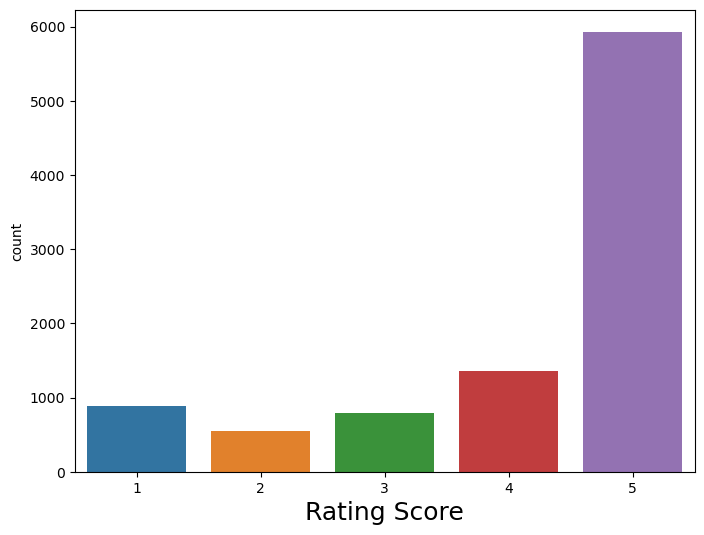

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x="Score", data=df)
plt.xlabel('Rating Score',fontdict = {'size' : 18})
plt.show()

- We have total five unique values of rating among them 5 rating has highest count

- Here we need to make certain changes in our score.
    - We have five unique values of score, in which score 1 & 2 is lowest score which is also considerd as negative review.
    - The Score 4 & 5 is considerd as positive review.
    - so, here we will encode positive score as '1' and negative socre as '0' 
    - score 3 is considerd as neutral.

### Now we will create our target variable from score

In [19]:
# changing the datatype of score
df.Score = pd.to_numeric(df.Score, errors='coerce')

In [20]:
# we will filter only those score with rating greater than 3(positive) and less than 3(negative)
def rating(x):
    if(x < 3):
        return 0

    else:
        return 1

In [21]:
df['rating'] = df['Score'].apply(rating)
df.rating.unique()

array([1, 0], dtype=int64)

In [22]:
df.head()

,Product_Id,User_Id,profile_name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,rating
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,1
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,1
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,0
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,1


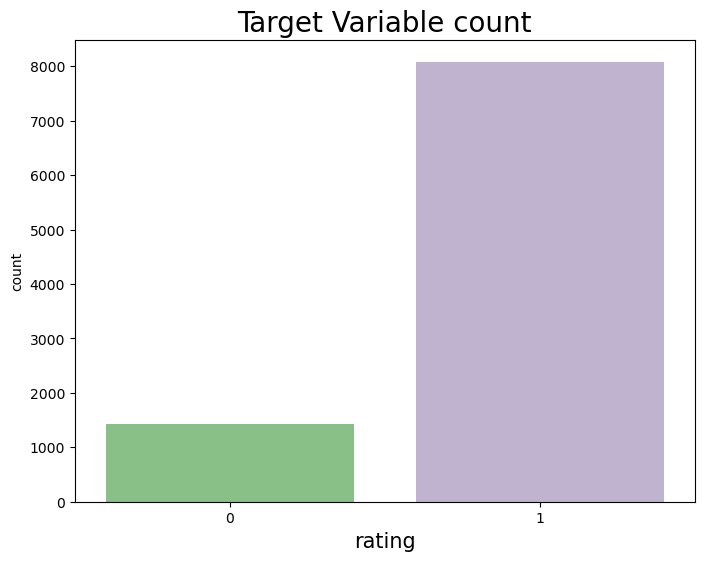

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'rating',data = df, palette='Accent' )
plt.title('Target Variable count',fontdict = {'size' : 20})
plt.xlabel('rating',fontdict = {'size' : 15})
plt.show()

- **We can clearly see that, we have imbalenced dataset for classification.**

In [24]:
#df[df['Helpfulness_Numerator'] > df['Helpfulness_Denominator']]


### Find popular words in positive and negative score

In [25]:
positive_score = df[df.rating == 1]['Review_Text']

In [26]:
positive_score

0        I have bought several of the Vitality canned ...
2        This is a confection that has been around a f...
4        Great taffy at a great price.  There was a wi...
5        I got a wild hair for taffy and ordered this ...
6        This saltwater taffy had great flavors and wa...
                              ...                        
9994     I switched from Similac Advanced to Organic w...
9996     Like the bad reviews say, the organic formula...
9997     I wanted to solely breastfeed but was unable ...
9998     i love the fact that i can get this delieved ...
9999     We have a 7 week old... He had gas and consti...
Name: Review_Text, Length: 8082, dtype: object

In [27]:
negative_score = df[df.rating == 0]['Review_Text']
negative_score

1        Product arrived labeled as Jumbo Salted Peanu...
3        If you are looking for the secret ingredient ...
12       My cats have been happily eating Felidae Plat...
16       I love eating them and they are good for watc...
26       The candy is just red , No flavor . Just  pla...
                              ...                        
9976     This was the first time I tried purchasing a ...
9977     I was surprised by the number of 5 star revie...
9985     You think you're doing something good for you...
9986     2.0 out of 5 stars Read this article first, A...
9995     we switched from the advance similac to the o...
Name: Review_Text, Length: 1433, dtype: object

In [28]:
p_text= ' '.join(positive_score)

p_clean = ' '.join([word for word in p_text.split()
                       if 'br' not in word])

p_wordcloud = WordCloud(stopwords = stopwords.words('english'),
                          background_color='black',
                          width=1500,
                          height=600).generate(p_clean)

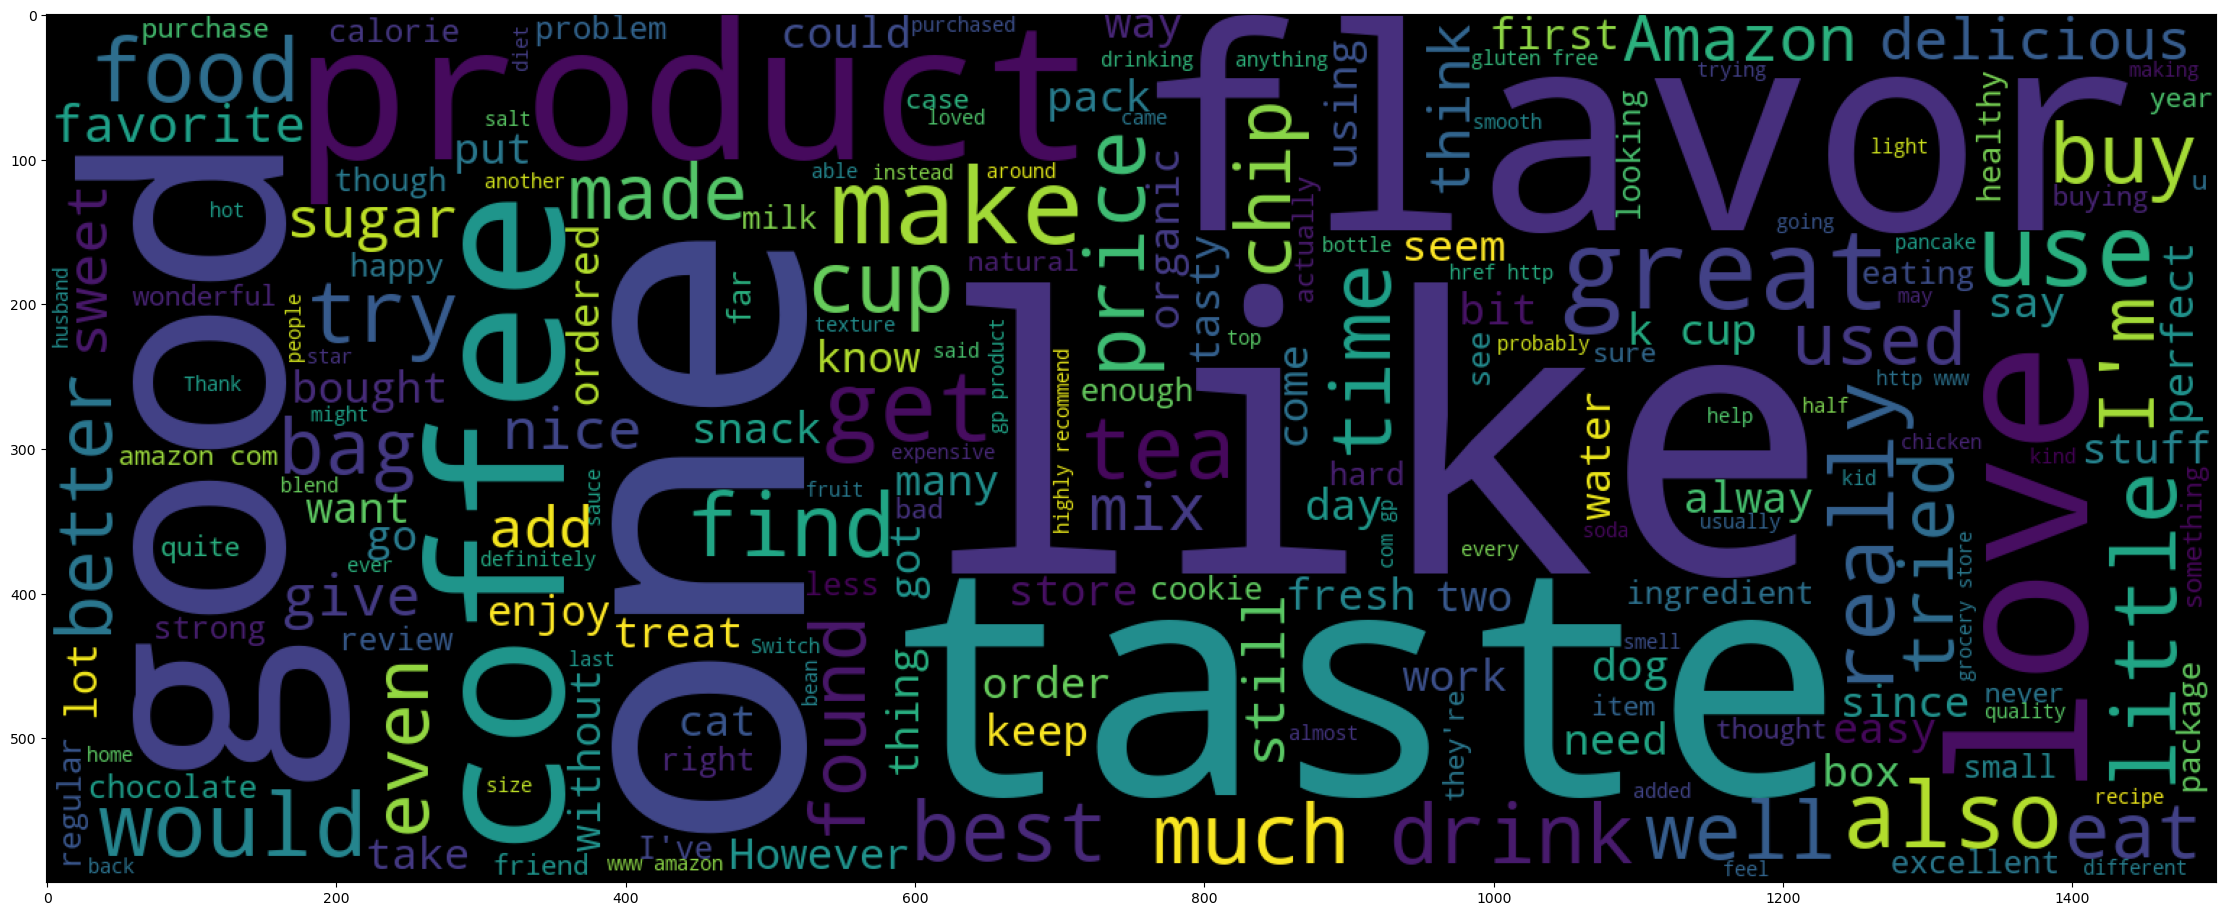

In [29]:
# plot wordcount of positive text
plt.figure(1,figsize=(28,22))
plt.imshow(p_wordcloud)
plt.show()

In [30]:
n_text= ' '.join(negative_score)
n_clean = ' '.join([word for word in n_text.split()
                       if 'br' not in word])
n_wordcloud = WordCloud(stopwords = stopwords.words('english'),
                          background_color='black',
                          width=1500,
                          height=600).generate(n_clean)

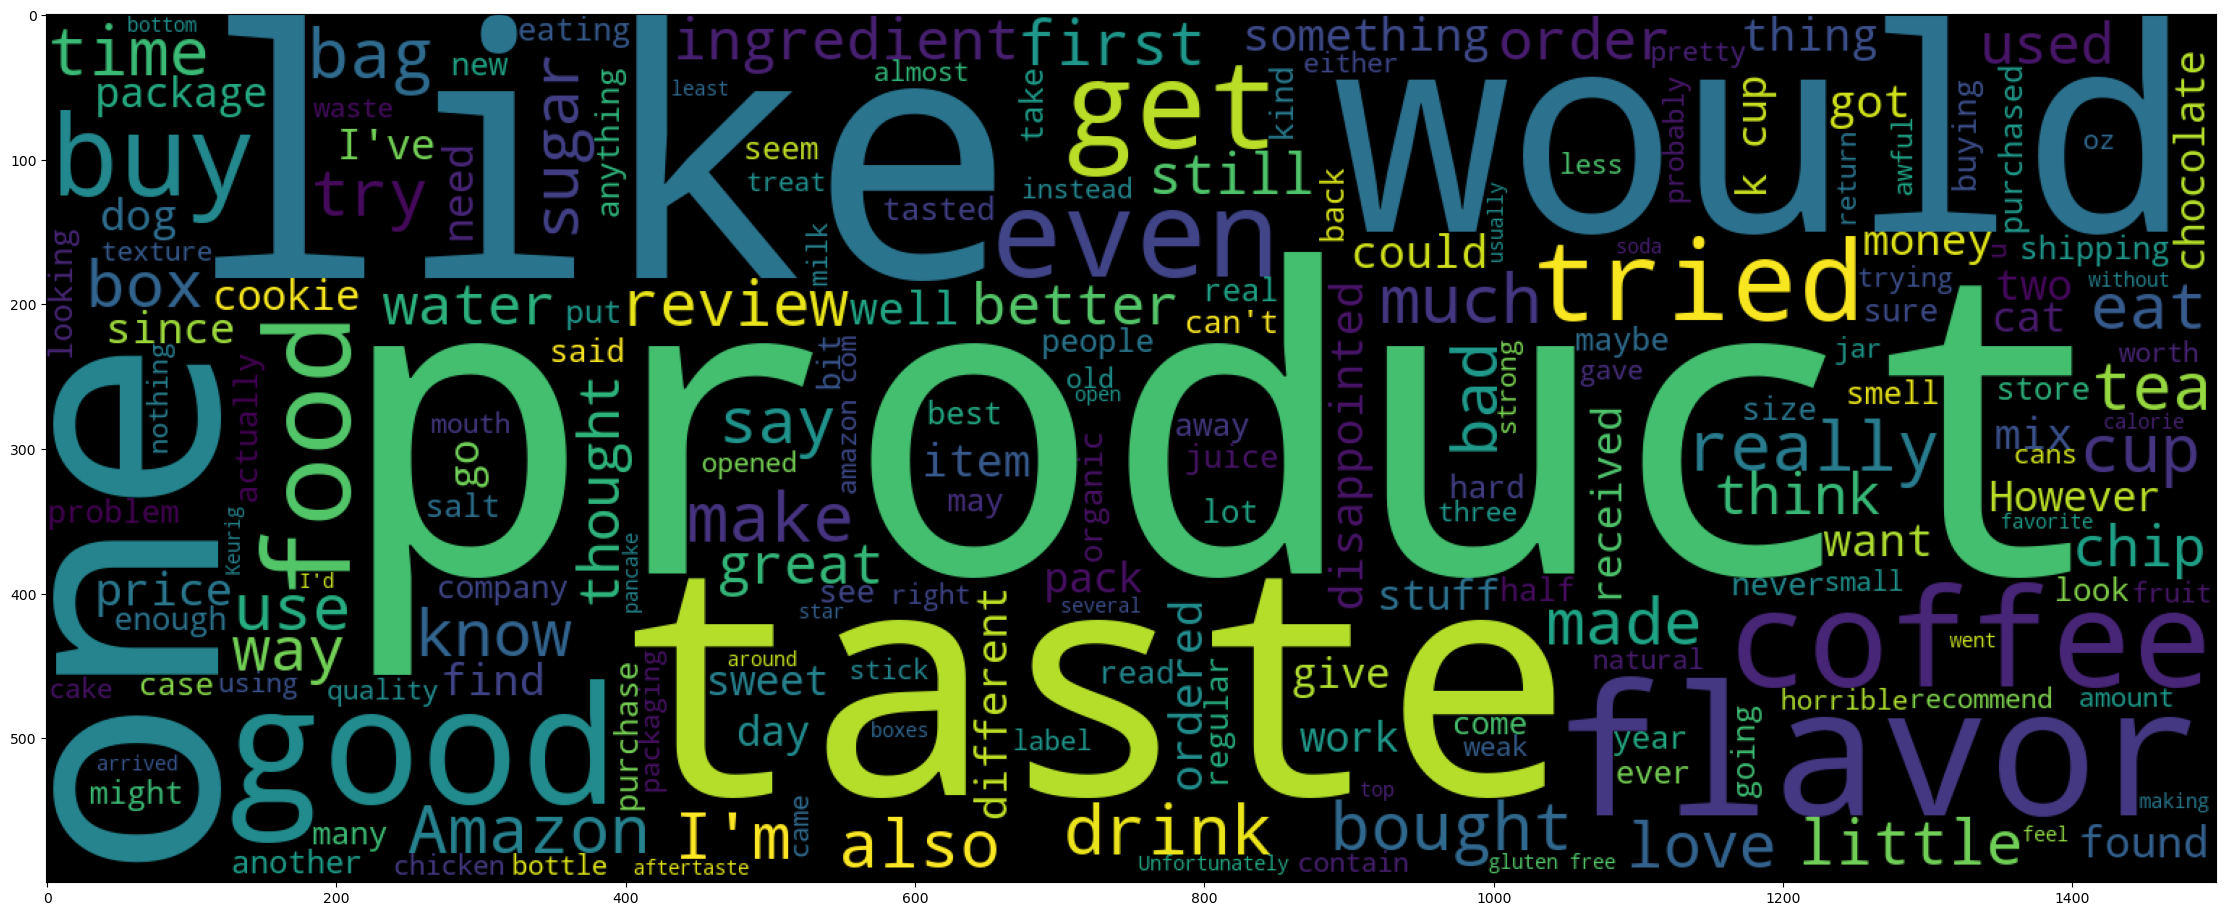

In [31]:
# plot wordcount of positive text
plt.figure(1,figsize=(28,22))
plt.imshow(n_wordcloud)
plt.show()

In [32]:
df.Helpfulness_Numerator = df.Helpfulness_Numerator.astype(int)

In [33]:
df.Helpfulness_Denominator = df.Helpfulness_Denominator.astype(int)

In [34]:
Helpfulness = df.Helpfulness_Numerator/df.Helpfulness_Denominator

In [35]:
Helpfulness = Helpfulness * 100

- Now we need to create a dataframe for helpfulness.
- we should divide the helpfulness into different categories
    - Helpful review : more than 75 % of voters
    - non helpful review : less than 25 % of voters
    - Intermediate review : on between 25 % to 75 %
    - no review : non voters

In [36]:
# creating dataframe of helpful
df_Helpfulness = pd.DataFrame(Helpfulness)

In [37]:
# creating column in df helpful
df_Helpfulness.columns = ['Helpfulness']

In [38]:
# create function for different helpfulness
def helpfulness_category(x):
    if x > 75:
        return 'Helpful'
    elif x < 25:
        return 'Nonhelpful'
    elif x >= 25 and x <= 75:
        return 'Intermediate'
    else:
        return 'No review'

In [39]:
df_Helpfulness['category'] = df_Helpfulness['Helpfulness'].apply(helpfulness_category)

In [40]:
df_Helpfulness

,Helpfulness,category
0,100.000000,Helpful
1,NaN,No review
2,100.000000,Helpful
3,100.000000,Helpful
4,NaN,No review
...,...,...
9995,66.666667,Intermediate
9996,66.666667,Intermediate
9997,NaN,No review
9998,50.000000,Intermediate


In [41]:
df_Helpfulness['category'].value_counts()

No review       4572
Helpful         3364
Intermediate     909
Nonhelpful       670
Name: category, dtype: int64

### Distribution of Helpfulness

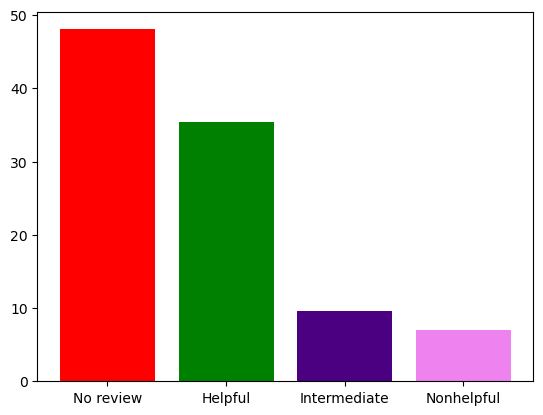

In [42]:
# plot distribution of helpfulness
height = df_Helpfulness.category.value_counts(normalize=True).values*100
bars = df_Helpfulness.category.value_counts(normalize=True).index
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=['red', 'green', 'indigo', 'violet'])
plt.xticks(x_pos, bars)
plt.show()

In [43]:
# lets make a copy of dataframe
df1 = df.copy() 

In [44]:
# concat helpfullness dataframe and df1
df1 = pd.concat([df1, df_Helpfulness], axis=1)
df1.head()

,Product_Id,User_Id,profile_name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,rating,Helpfulness,category
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,1,100.0,Helpful
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,0,NaN,No review
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,1,100.0,Helpful
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,0,100.0,Helpful
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,1,NaN,No review


In [45]:
# lets remove no review from df1
df1 = df1[df1.category != 'No review']
df1.shape

(4943, 12)

### How does rating affect on Helpfulness?

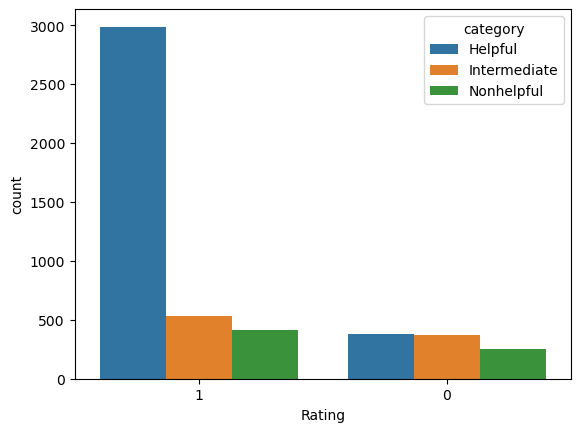

In [46]:
sns.countplot(x='rating', hue='category', order=[1, 0], 
              hue_order=['Helpful', 'Intermediate', 'Nonhelpful'], data=df1)
plt.xlabel('Rating')
plt.show()

**Here we can see that, positive rating review found more helpful**

### Word count

In [47]:
df2 = df_copy.copy()

In [48]:
# wordcount function
def word_count(x):
    rex = len(re.findall(r'\w+',x))
    return rex

In [49]:
df2['Wordcount'] = df2.Review_Text.apply(word_count)

In [50]:
df2.head()

,Product_Id,User_Id,profile_name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,Wordcount
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,48
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,32
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,93
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,41
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,27


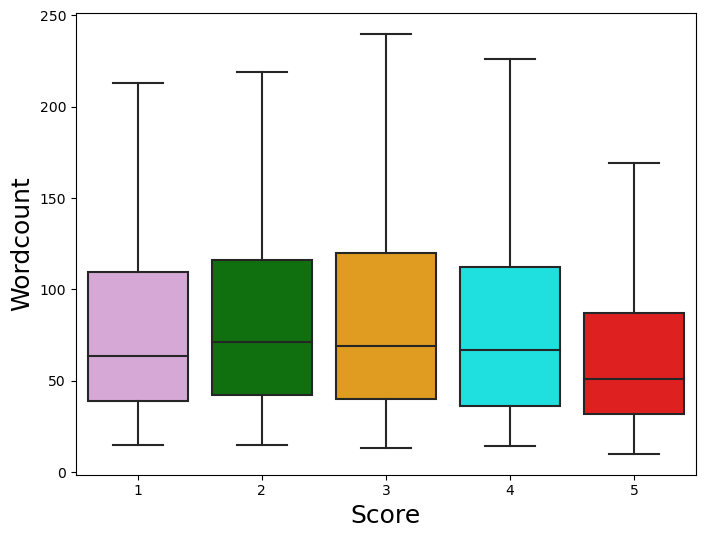

In [51]:
# plotting word count v/s score 
plt.figure(figsize=(8,6))
palette = ['plum', 'g', 'orange', 'cyan', 'r']
sns.boxplot(x = 'Score',y = 'Wordcount',data = df2,showfliers=False, palette = palette)
plt.xlabel("Score", fontdict={'size':18})
plt.ylabel("Wordcount", fontdict={'size':18})
plt.show()

**5-star reviews has the lowest median word count.**

In [52]:
df1['Wordcount'] = df1.Review_Text.apply(word_count)

In [53]:
df1.head()

,Product_Id,User_Id,profile_name,Helpfulness_Numerator,Helpfulness_Denominator,Score,Time,Review_Summary,Review_Text,rating,Helpfulness,category,Wordcount
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,1,100.0,Helpful,48
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,1,100.0,Helpful,93
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,0,100.0,Helpful,41
8,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so m...,1,100.0,Helpful,27
10,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequil...,1,100.0,Helpful,154


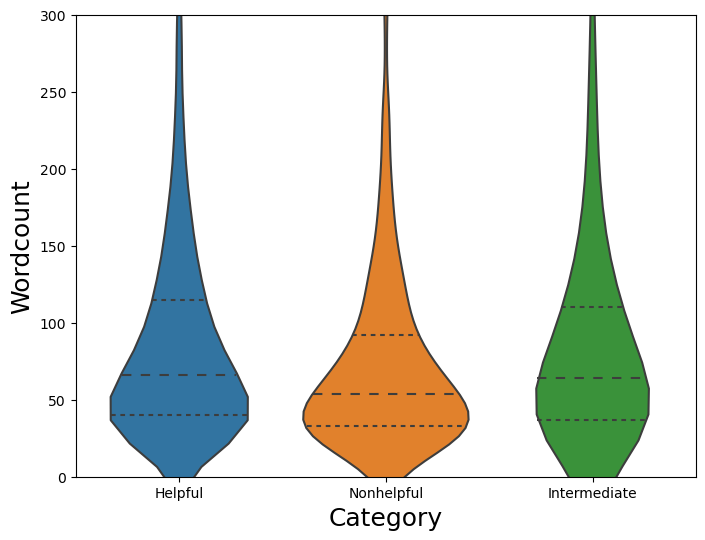

In [54]:
# plotting wordcount v/s helpfulness
plt.figure(figsize=(8,6))
sns.violinplot(x = 'category',y = 'Wordcount',data = df1,inner='quartile')
plt.ylim(0,300)
plt.xlabel("Category", fontdict={'size':18})
plt.ylabel("Wordcount", fontdict={'size':18})
plt.show()

**wordcount of all categories are almost same but helpful review has more wordcount than others.**

### Things we can conclude from  analysis:

- Most probably reviewrs give positive review.

- Positive reviews seems shorter than others.

- Longer reviews are more helpful for people.




<p style = "font-size:30px; color: #007580  "><strong> Model building</strong></p>

In [55]:
# import necessary libraries
import tensorflow as tf
from keras.layers import Dense, SimpleRNN, LSTM ,Embedding , GRU, Dropout, SpatialDropout1D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from imblearn.over_sampling import SMOTE



In [56]:
#initialize feature and target
X = df.loc[: , ['Review_Text']]
y = df.loc[: , 'rating']

In [57]:
# train test split
X_train  , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state=42)

In [58]:
# tokenize the word
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words= 10000)
tokenizer.fit_on_texts(X_train.Review_Text)

In [59]:
X_train = tokenizer.texts_to_sequences(X_train.Review_Text)
X_test = tokenizer.texts_to_sequences(X_test.Review_Text)

In [60]:
# Pad all sequences
X_train = pad_sequences(X_train, maxlen = 50, padding= "post") 
X_test = pad_sequences(X_test, maxlen = 50, padding= "post") 


In [61]:
# balancing target variable
oversample = SMOTE()
# fit and apply the oversampler to the training data
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)

In [73]:
# lstm model
model = Sequential()
model.add(Embedding(10000, 128, input_length=X_train_oversampled.shape[1]))
model.add(LSTM(80, dropout=0.25, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_oversampled, y_train_oversampled, batch_size=100, epochs=20, validation_split=(0.2))

Epoch 1/20
104/104 [==============================] - 16s 133ms/step - loss: 0.5895 - accuracy: 0.6812 - val_loss: 0.5525 - val_accuracy: 0.7238
Epoch 2/20
104/104 [==============================] - 14s 131ms/step - loss: 0.3943 - accuracy: 0.8363 - val_loss: 0.4526 - val_accuracy: 0.7982
Epoch 3/20
104/104 [==============================] - 14s 132ms/step - loss: 0.2875 - accuracy: 0.8872 - val_loss: 0.5759 - val_accuracy: 0.7735
Epoch 4/20
104/104 [==============================] - 14s 132ms/step - loss: 0.2112 - accuracy: 0.9195 - val_loss: 0.5121 - val_accuracy: 0.7847
Epoch 5/20
104/104 [==============================] - 14s 132ms/step - loss: 0.1453 - accuracy: 0.9461 - val_loss: 0.6301 - val_accuracy: 0.7890
Epoch 6/20
104/104 [==============================] - 14s 133ms/step - loss: 0.1027 - accuracy: 0.9645 - val_loss: 0.5889 - val_accuracy: 0.8233
Epoch 7/20
104/104 [==============================] - 14s 131ms/step - loss: 0.0827 - accuracy: 0.9731 - val_loss: 0.7881 - val_ac

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [74]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)
confusion_matrix(y_test, y_pred_class)


60/60 [==============================] - 1s 10ms/step


array([[ 169,  132],
       [ 278, 1324]], dtype=int64)

In [75]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_class))


60/60 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.38      0.56      0.45       301
           1       0.91      0.83      0.87      1602

    accuracy                           0.78      1903
   macro avg       0.64      0.69      0.66      1903
weighted avg       0.83      0.78      0.80      1903



60/60 [==============================] - 1s 10ms/step


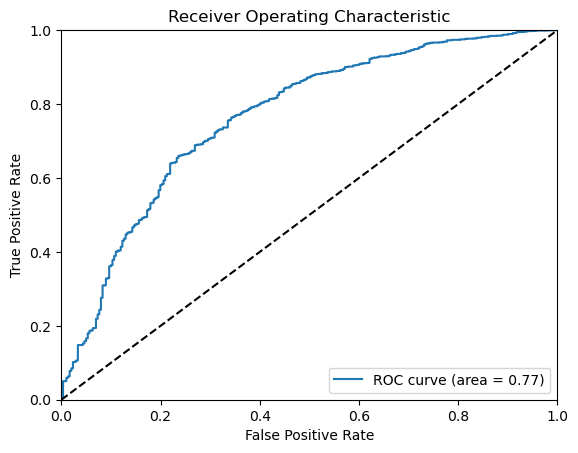

In [76]:
from sklearn.metrics import roc_curve, auc

y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
